In [1]:
import numpy as np
import utils
from utils import loadmat
from extractDigitFeatures import extractDigitFeatures
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Conv3D, Flatten, MaxPool2D, AveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.python.keras import metrics
from keras import regularizers
from keras.constraints import unit_norm
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.


In [2]:
def model_extractor(activation_func='relu', weight_decay=1e-4):
    # Creating an AlexNet Classifier
    model = Sequential()

    #Instantiating Layer 1
    model.add(Conv2D(48, kernel_size=(3, 3), strides=(1, 1), activation=activation_func, padding='valid', 
                    kernel_constraint=unit_norm(), kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

    # #Instantiating Layer 2
    model.add(Conv2D(96, kernel_size=(3, 3), strides=(1, 1), activation=activation_func, padding='same', 
                    kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    # #Instantiating Layer 3
    model.add(Conv2D(192, kernel_size=(3, 3), strides=(1, 1), activation=activation_func, padding='same',
                    kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())

    # #Instantiating Layer 4
    model.add(Conv2D(192, kernel_size=(3, 3), strides=(1, 1), activation=activation_func, padding='same', 
                    kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())

    # #Instantiating Layer 5
    model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation=activation_func, padding='same', 
                    kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())

    #Instantiating Layer 6
    model.add(Dense(512, activation=activation_func)) 

    # #Instantiating Layer 8
    model.add(Dense(256, activation=activation_func))

    #Output Layer
    model.add(Dense(10, activation='softmax'))
    return model

In [3]:
def reformat(x):
    new_x = np.zeros((x.shape[2], x.shape[0], x.shape[1]))
    for i in range(x.shape[2]):
        new_x[i, :] = x[:, :, i]
    return new_x[:, :, :, np.newaxis]

In [4]:
def return_datasets(filename):
    data = utils.loadmat('../data/{}'.format(filename))
    trainSet, testSet, valSet = 1, 2, 3
    
    x_train = reformat(data['x'][:, :, data['set']==trainSet ])
    y_train = (data['y'][data['set']==trainSet])
    x_val = reformat(data['x'][:, :, data['set']==valSet])
    y_val = (data['y'][data['set']==valSet])
    x_test = reformat(data['x'][:, :, data['set']==testSet])
    y_test = (data['y'][data['set']==testSet])
    X = np.vstack([x_train, x_val])
    Y = np.vstack([y_train[:, np.newaxis], y_val[:, np.newaxis]])
    
    return (X, Y, x_test, y_test)

In [7]:
X, Y, x_test, y_test = return_datasets('digits-scaled.mat')

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for train, test in kfold.split(X, Y):
    model = model_extractor('relu')
    model.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])
    model.fit(X[train], Y[train], epochs=15, batch_size=200, verbose=1)
    accuracy = model.evaluate(X[test], Y[test], batch_size=int(Y[test].size/5), verbose=0)[1]
    print ("Accuracy = {}".format(accuracy))

Train on 1350 samples
Epoch 1/15
1350/1350 [==============================] - 3s 3ms/sample - loss: 129.8530 - accuracy: 0.0081
Epoch 2/15
1350/1350 [==============================] - 1s 931us/sample - loss: 265.8118 - accuracy: 0.0348
Epoch 3/15
1350/1350 [==============================] - 1s 843us/sample - loss: 701.6648 - accuracy: 0.0000e+00
Epoch 4/15
1350/1350 [==============================] - 1s 919us/sample - loss: 1562.2785 - accuracy: 7.4074e-04
Epoch 5/15
1350/1350 [==============================] - 1s 920us/sample - loss: 2966.2309 - accuracy: 0.0000e+00
Epoch 6/15
1350/1350 [==============================] - 1s 953us/sample - loss: 4948.9004 - accuracy: 0.0000e+00
Epoch 7/15
1350/1350 [==============================] - 1s 1ms/sample - loss: 7815.8483 - accuracy: 0.0000e+00
Epoch 8/15
1350/1350 [==============================] - 1s 980us/sample - loss: 11638.0887 - accuracy: 0.0000e+00
Epoch 9/15
1350/1350 [==============================] - 1s 1ms/sample - loss: 16481.3403

1350/1350 [==============================] - 2s 1ms/sample - loss: 78643.8990 - accuracy: 0.0000e+00
Epoch 13/15
1350/1350 [==============================] - 1s 1ms/sample - loss: 99163.3993 - accuracy: 0.0000e+00
Epoch 14/15
1350/1350 [==============================] - 2s 1ms/sample - loss: 122647.1574 - accuracy: 0.0000e+00
Epoch 15/15
1350/1350 [==============================] - 2s 1ms/sample - loss: 150605.2587 - accuracy: 0.0000e+00
Accuracy = 0.0
Train on 1350 samples
Epoch 1/15
1350/1350 [==============================] - 6s 4ms/sample - loss: 134.5328 - accuracy: 0.3844
Epoch 2/15
1350/1350 [==============================] - 3s 2ms/sample - loss: 290.5045 - accuracy: 0.1437
Epoch 3/15
1350/1350 [==============================] - 3s 2ms/sample - loss: 761.0211 - accuracy: 0.0000e+00
Epoch 4/15
1350/1350 [==============================] - 3s 2ms/sample - loss: 1795.8707 - accuracy: 0.0000e+00
Epoch 5/15
1350/1350 [==============================] - 3s 2ms/sample - loss: 3679.2860 

1350/1350 [==============================] - 3s 2ms/sample - loss: 38274.9076 - accuracy: 1.0000
Epoch 10/15
1350/1350 [==============================] - 3s 2ms/sample - loss: 52844.1615 - accuracy: 1.0000
Epoch 11/15
1350/1350 [==============================] - 3s 2ms/sample - loss: 70777.9196 - accuracy: 1.0000
Epoch 12/15
1350/1350 [==============================] - 2s 2ms/sample - loss: 91467.6262 - accuracy: 1.0000
Epoch 13/15
1350/1350 [==============================] - 2s 2ms/sample - loss: 114866.6808 - accuracy: 1.0000
Epoch 14/15
1350/1350 [==============================] - 2s 2ms/sample - loss: 142715.0590 - accuracy: 1.0000
Epoch 15/15
1350/1350 [==============================] - 5s 3ms/sample - loss: 174654.8351 - accuracy: 1.0000
Accuracy = 1.0


In [9]:
print ("Test Set Accuracy for = {}".format(model.evaluate(x_test, y_test, verbose=0)))

Test Set Accuracy for = [151562.81018830778, 1.0]


In [11]:
X.shape

(1500, 28, 28, 1)

In [ ]:
print ("Test Set Accuracy for = {}".format(best_model.evaluate(x_test, y_test, verbose=0)))

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

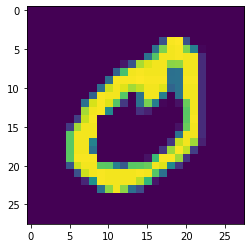

In [13]:
plt.imshow(X[1].reshape(28, 28))

In [ ]:
X, Y, x_test, y_test = return_datasets(file)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

best_model, best_accuracy = -1, 0
for train, test in kfold.split(X, Y):
    model = model_extractor('selu')
    model.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])
    model.fit(X[train], Y[train], epochs=15, batch_size=200, verbose=0)
    scores = model.evaluate(X[test], Y[test], batch_size=int(Y[test].size/5), verbose=0)
    print ("Accuracy = {}".format(scores[1]))
    if scores[1] > best_accuracy:
        best_accuracy = scores[1]
        best_model = model

    if best_accuracy > .99:
        break    

print ("Test Set Accuracy for {} = {}".format(file, best_model.evaluate(x_test, y_test)))